# Do LLMs Fairly Represent Global Happiness? An Empirical Bias Audit on Gallup Dataset

**Saarland University - Data and Society Seminar (Winter 2025)**

**Authors:** Sina Elahi Manesh, Yassal Arif, Akash Chavanta

---

## Abstract

This study presents a comprehensive analysis of global happiness patterns using the World Happiness Report dataset (2011–2024). We investigate systematic biases in how large language models (LLMs) perceive and represent happiness across 147 countries with available Gallup data. We combine traditional statistical methods—weighted linear regression for driver analysis, trend analysis, and group comparisons with significance testing, with a novel LLM audit framework employing 20 diverse personas per country evaluated against real 2024 outcomes. Through hyperparameter and prompt-tuning, we identified systematic overestimation in LLM responses and developed four methodological approaches (initial 7-question, few-shot calibration, pure Gallup single-question, and structured-personas single-question) to mitigate bias. Our findings reveal that GDP and social support are the strongest happiness drivers globally, that LLMs exhibit significant overestimation particularly for factor-level metrics due to scale mismatch, and that calibration techniques substantially improve alignment with ground-truth data. This work contributes both to the understanding of global well-being determinants and to the emerging field of AI fairness in subjective well-being representation.

---

## 1. Introduction

Understanding what drives human well-being has long been a central concern for policymakers, researchers, and societies. The World Happiness Report, published annually since 2011, provides a rigorous, data-driven framework for examining life satisfaction across nations using the Gallup World Poll's Cantril Ladder methodology. Beyond its policy relevance, happiness data offers a lens through which to examine economic development, social cohesion, health systems, and governance quality.


As large language models (LLMs) are increasingly used to reason about human experiences and even simulate survey responses, it is critical to examine how accurately and fairly they represent global well-being. Although LLMs can reference objective indicators such as World Happiness scores, their training on vast and uneven text corpora may encode systematic biases toward certain countries, regions, or socioeconomic groups. When these models generate synthetic data or inform social science analyses, such biases can propagate into downstream decisions. Auditing LLM perceptions of happiness by comparing model outputs with empirically collected data therefore serves both methodological and ethical purposes, helping to identify nationality- and income-based distortions and evaluate mitigation strategies.


Our project includes two phases, a traditional analysis of global well-being data and a systematic audit of AI’s perception of happiness, both presented through an interactive dashboard. For the traditional part, we analyze World Happiness Report data (2011–2024) using weighted linear regression, t-tests, and trend analysis to identify key drivers, long-term trends, and group differences, with results visualized across tabs such as World Map, Driver Analysis, Trends, Group Comparisons, and Overview. In parallel, the LLM bias audit compares AI-generated happiness estimates to real-world 2024 outcomes. To ensure reliability before scaling, we conducted prompt tuning (testing baseline, simplified, and scale-reminder variants on a subset of countries and selecting the best based on MAE and correlation) and hyperparameter tuning (e.g., temperature and chain-of-thought) on 10 countries to reduce systematic overestimation. We also developed personas, initially defining 20 diverse profiles per country and later formalizing them into structured fields (nationality, job, gender, living situation, family status, hobbies) to improve reproducibility and maintain a clear nationality focus. Across four approaches—initial 7-question, few-shot calibrated, single-question Gallup-style, and structured personas—we observed a substantial reduction in overestimation bias from roughly 6–10 points to 2–4 points with improved prompting, with all results presented in a dedicated LLM Audit tab.


Bias analysis by group (ANOVA and t-tests vs. real data, with Bonferroni correction where applicable) shows a consistent pattern: overestimation concentrates in less affluent regions, while wealthier regions tend to be underestimated. The Global South, World 2 and 3, Africa, Asia, South Asia, low and lower-middle income countries, and Eastern groups are significantly overestimated, whereas the Global North, World 1 (slightly), North and Latin America, high-income countries, and Western groups are underestimated. At the factor level (GDP, social support, health, freedom, generosity, corruption), strong systematic overestimation appears due to scale mismatch (LLM 0–10 vs. real ~0–2). Across approaches, the most overestimated countries (LLM > real) are typically lower-income or Global South nations (e.g., Botswana, Comoros, Eswatini, Bangladesh, Ghana, Cambodia), while the most underestimated (LLM < real) are generally high-happiness or Western/Nordic countries (e.g., Costa Rica, Finland, Denmark, Canada, Belize, and other Nordic and North American countries), and specifically Israeil.

### Data Sources & Processing Pipeline

All data in this project flows through a structured pipeline. The table below summarises every data source, its origin, processing steps, and output location.

| **Data Source** | **Origin** | **Processing** | **Output / Location** |
|-----------------|------------|----------------|------------------------|
| **Real Happiness Data** | World Happiness Report main Excel dataset (`dataset.xlsx`, loaded via `data_loader.load_data`) | `load_data()` → `clean_data()` → `add_regions()` → `add_income_levels()` | In-memory `df`; columns: Year, country, happiness_score, gdp, social_support, life_expectancy, freedom, generosity, corruption, region, income_level |
| **Initial LLM Audit** | OpenAI GPT API (Method 1) | 7 questions × 20 personas × all countries; temp=0.0; simplified prompt | `llm_audit_data/initial_approach/results/llm_audit_results.csv` |
| **Few-Shot LLM Audit** | OpenAI GPT API (Method 2) | 7 questions + calibration examples; temp=0.3; percentile anchoring | `llm_audit_data/few_shot_approach/results/llm_audit_results.csv` |
| **Single-Question Gallup** | OpenAI GPT API (Method 3) | 1 Cantril Ladder question only; temp=0.3 | `llm_audit_data/single_question_gallup_approach/results/llm_audit_results.csv` |
| **Structured Personas** | OpenAI GPT API (Method 4) | Same single Cantril question; personas as structured fields (nationality, job, gender, etc.); temp=0.3 | `llm_audit_data/structured_personas_approach/results/llm_audit_results.csv` |
| **LLM vs Real Comparison** | Merged from LLM results + real data | `analyze_llm_vs_real.py` | `llm_audit_data/results/llm_vs_real_comparison.csv`, `llm_vs_real_statistics.txt` |
| **Bias Analysis** | Comparison data + groupings | `analyze_bias.py` | `bias_summary_*.csv`, `bias_analysis_data_*.csv`, `significant_findings_*.csv` |
| **Hyperparameter Tuning** | API experiments (10 countries) | `hyperparameter_tuning.py` | `hyperparameter_tuning_metrics_*.csv`, `hyperparameter_tuning_results_*.csv` |
| **Prompt Tuning** | API experiments (10 countries) | `prompt_tuning.py` | `prompt_tuning_metrics_*.csv`, `prompt_tuning_results_*.csv` |

---

## 2. Related Work

**World Happiness and Well-Being Measurement.**
Large-scale measurement of subjective well-being has been institutionalized through the World Happiness Report, which relies on the Cantril Ladder (0–10) as a cognitive life-evaluation instrument derived from the Gallup World Poll [1]. This ladder-based measure has been widely validated and theoretically grounded in broader well-being scholarship, including hedonic and eudaimonic traditions [7,8]. Foundational work by Diener et al. formalized subjective well-being as a measurable construct [9], while subsequent validation studies have examined convergent validity with instruments such as WEMWBS [2] and methodological considerations in cross-national scaling and aggregation [10]. Together, this literature establishes happiness scores as structured, survey-based socio-economic indicators rather than abstract sentiment proxies.

**LLM Bias, Synthetic Judgments, and Fairness Governance.**
Parallel to advances in well-being measurement, recent research shows that large language models encode subtle and intersectional biases beyond gender, including age, nationality, institutional prestige, and appearance [3]. Broader audits demonstrate risks of stereotyping and representational harms in foundation models [11,12], while studies of algorithmic bias highlight how seemingly neutral systems can reproduce structural inequalities [13]. In response, technical toolkits such as AI Fairness 360 [4] and Fairlearn [6] operationalize group fairness metrics and mitigation strategies, and socio-technical governance frameworks emphasize documentation, stakeholder engagement, and organizational checklists for responsible AI deployment [5,14]. Building on these strands, our work treats LLM-generated happiness assessments as synthetic social data, an artifact that can and should be audited against validated well-being benchmarks and fairness principles.


---

## 3. Dataset


### 3.1 Data Overview

**Source:** World Happiness Report (2011–2024), covering 147 countries with available Gallup data (1510 records, 166 distinct countries in the extended dataset, including years with partial or missing coverage).

**Metrics:** 7 total, Overall Happiness Score (0–10 Cantril Ladder) + 6 Factors: GDP per capita, Social Support, Healthy Life Expectancy, Freedom to Make Life Choices, Generosity, Perceptions of Corruption (each ~0–2 range).

**Data Structure:** Annual per country; groupings by region, income level, development status. Preprocessing handled in `data_loader.py` (e.g., merging, scaling, mock data for gaps).

### Real Data Columns (main WHR Excel dataset)

| **Column** | **Description** |
|------------|-----------------|
| Year | Survey year |
| country | Country name |
| happiness_score | Overall life evaluation (Cantril Ladder, 0–10) |
| gdp | Explained by: Log GDP per capita (regression contribution, ~0–1.8) |
| social_support | Explained by: Social support |
| life_expectancy | Explained by: Healthy life expectancy |
| freedom | Explained by: Freedom to make life choices |
| generosity | Explained by: Generosity |
| corruption | Explained by: Perceptions of corruption |
| region | Geographic region (added by `add_regions`) |
| income_level | High / Upper Middle / Lower Middle / Low (added by `add_income_levels`) |

In [74]:
# Setup and imports
import pandas as pd
import numpy as np
import sys
from pathlib import Path

# Add project root to path
project_root = Path('.').resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from data_loader import load_data, clean_data, add_regions, add_income_levels

In [75]:
# Load and clean the World Happiness Report data
df_raw = load_data('dataset.xlsx')
df = clean_data(df_raw)
df = add_regions(df)
df = add_income_levels(df)

print("Dataset Overview:")
print(f"  Total records: {len(df)}")
print(f"  Years: {df['Year'].min()} - {df['Year'].max()}")
print(f"  Countries: {df['country'].nunique()}")
print(f"\nColumns: {list(df.columns)}")
df.head(10)

Dataset Overview:
  Total records: 1969
  Years: 2011 - 2024
  Countries: 168

Columns: ['Year', 'Rank', 'country', 'happiness_score', 'Lower whisker', 'Upper whisker', 'gdp', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption', 'Dystopia + residual', 'region', 'income_level']


,Year,Rank,country,happiness_score,Lower whisker,Upper whisker,gdp,social_support,life_expectancy,freedom,generosity,corruption,Dystopia + residual,region,income_level
0,2024,147,Afghanistan,1.3640,1.30100,1.42700,0.649000,0.000000,0.155000,0.0,0.075000,0.135000,0.348000,South Asia,Low Income
1,2023,143,Afghanistan,1.7210,1.66700,1.77500,0.628000,0.000000,0.242000,0.0,0.091000,0.088000,0.672000,South Asia,Low Income
2,2022,137,Afghanistan,1.8590,1.79500,1.92300,0.645000,0.000000,0.087000,0.0,0.093000,0.059000,0.976000,South Asia,Low Income
3,2021,146,Afghanistan,2.4040,2.33900,2.46900,0.758000,0.000000,0.289000,0.0,0.089000,0.005000,1.263000,South Asia,Low Income
4,2020,150,Afghanistan,2.5230,2.44900,2.59600,0.370000,0.000000,0.126000,0.0,0.122000,0.010000,1.895000,South Asia,Low Income
5,2019,153,Afghanistan,2.5669,2.50553,2.62827,0.300706,0.356434,0.266052,0.0,0.135235,0.001226,1.507236,South Asia,Low Income
6,2018,154,Afghanistan,3.2030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low Income
7,2017,145,Afghanistan,3.6320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low Income
8,2016,141,Afghanistan,3.7940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low Income
9,2015,154,Afghanistan,3.3600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low Income


---

### 3.2 Exploratory Analysis

The analysis begins with an initial exploratory phase, followed by weighted linear regression to assess and rank the importance of well-being factors at both global and regional levels (using scaled data). Trend analysis is conducted to examine yearly changes, measure volatility through standard deviation, and identify the top improving and declining countries. Group comparisons are performed using statistical tests, t-tests for pairwise comparisons and ANOVA for multiple groups, across regions and income levels, with significance determined at p < 0.05 and adjusted using Bonferroni correction. The analysis is implemented using Pandas for data processing and SciPy and Statsmodels for statistical testing.


In [76]:
# Table: Initial Real Data Structure (sample from latest year)
latest_year = df['Year'].max()
df_sample = df[df['Year'] == latest_year][['country', 'happiness_score', 'gdp', 'social_support', 
    'life_expectancy', 'freedom', 'generosity', 'corruption', 'region', 'income_level']].head(15)
print("Initial Real Data (World Happiness Report) - Latest Year Sample")
print("="*100)
display(df_sample)

Initial Real Data (World Happiness Report) - Latest Year Sample


,country,happiness_score,gdp,social_support,life_expectancy,freedom,generosity,corruption,region,income_level
0,Afghanistan,1.364,0.649,0.000,0.155,0.000,0.075,0.135,South Asia,Low Income
13,Albania,5.411,1.371,1.122,0.696,0.841,0.103,0.057,Other,Upper Middle Income
26,Algeria,5.571,1.315,1.363,0.782,0.522,0.057,0.219,Africa,Upper Middle Income
45,Argentina,6.397,1.504,1.622,0.579,0.824,0.048,0.083,Latin America,Upper Middle Income
58,Armenia,5.494,1.391,1.349,0.828,0.786,0.032,0.158,Other,Upper Middle Income
71,Australia,6.974,1.767,1.647,0.841,0.857,0.164,0.285,Oceania,High Income
84,Austria,6.810,1.791,1.592,0.814,0.856,0.179,0.280,Western Europe,High Income
97,Azerbaijan,4.875,1.428,1.030,0.707,0.785,0.076,0.179,Other,Upper Middle Income
109,Bahrain,6.030,1.752,1.391,0.609,0.907,0.148,0.167,Middle East,Upper Middle Income
122,Bangladesh,3.851,1.116,0.286,0.592,0.920,0.110,0.132,South Asia,Low Income


**Driver Analysis:**
 We conduct a driver analysis using weighted linear regression (StandardScaler + LinearRegression) to rank the relative importance of key factors, GDP, social support, health, freedom, generosity, and corruption, at both global and regional levels, interpreting coefficients and overall model fit (R²) to assess how well these variables explain national variation. Trend analysis examines global and regional evolution from 2011 to 2024 (with narrative focus on 2013–2023) through line plots, volatility measures (standard deviation), and identification of the most improved and declined countries. Group comparisons are further supported by visualizations such as box plots to contrast well-being distributions across different country groups.


In [77]:
from driver_analysis import calculate_feature_importance, get_driver_summary

importance, model, scaler = calculate_feature_importance(df)
summary = get_driver_summary(df)

print("Driver Analysis: Factor Importance (Weighted Linear Regression)")
print("="*60)
print(importance[['feature', 'coefficient', 'rank']].to_string(index=False))
print(f"\nR-squared: {summary['r_squared']:.4f}")
print(f"Top driver: {summary['top_driver']}")

Driver Analysis: Factor Importance (Weighted Linear Regression)
        feature  coefficient  rank
 social_support     0.477717     1
        freedom     0.307110     2
life_expectancy     0.227191     3
            gdp     0.187004     4
     corruption     0.126695     5
     generosity     0.033813     6

R-squared: 0.8194
Top driver: social_support


In [78]:
from trend_analysis import get_global_trends, get_volatility_analysis, calculate_trend_statistics

global_trends = get_global_trends(df)
volatility = get_volatility_analysis(df)
stats = calculate_trend_statistics(df)

print("Global Happiness Trends (2011-2024)")
print("="*60)
print(global_trends.to_string(index=False))
print(f"\nGlobal change: {stats['global_start']:.3f} → {stats['global_end']:.3f} ({stats['global_change']:+.3f})")
print("\nTop 5 most volatile countries:")
print(volatility.head().to_string(index=False))

Global Happiness Trends (2011-2024)
 Year  average_happiness  yoy_change
 2011           5.391538         NaN
 2012           5.418731    0.504352
 2014           5.375741   -0.793364
 2015           5.382185    0.119876
 2016           5.354019   -0.523307
 2017           5.375878    0.408270
 2018           5.407096    0.580704
 2019           5.473240    1.223276
 2020           5.532839    1.088917
 2021           5.553575    0.374788
 2022           5.539796   -0.248123
 2023           5.527580   -0.220499

Global change: 5.392 → 5.528 (+0.136)

Top 5 most volatile countries:
    country  std_dev  mean_score  min_score  max_score  volatility_ratio
Afghanistan 0.843721    3.077992      1.721      4.258          0.274114
    Lebanon 1.067585    4.414875      2.392      5.225          0.241815
     Angola 0.692355    4.209333      3.795      5.589          0.164481
      Syria 0.586462    3.584000      3.006      4.735          0.163633
      Benin 0.670859    4.180083      3.340    

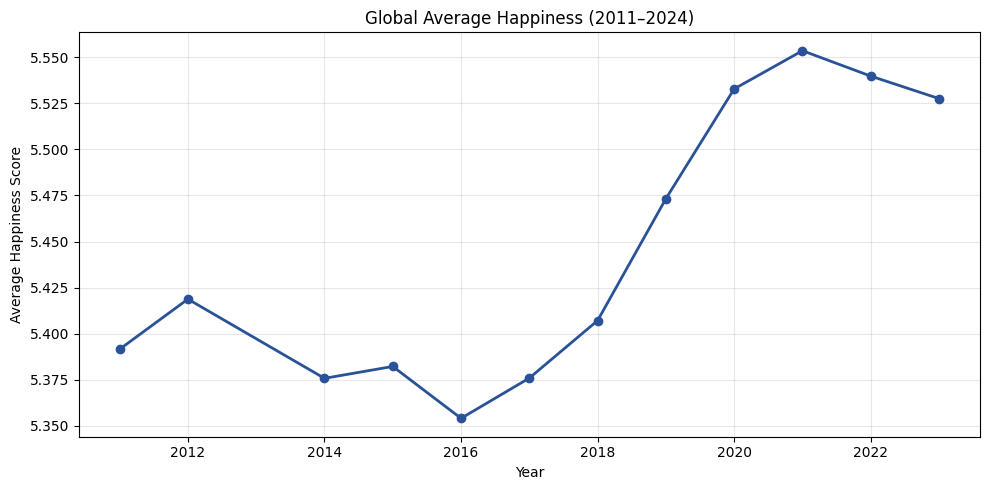

In [79]:
# Figure: Global Happiness Trend Over Time
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(global_trends['Year'], global_trends['average_happiness'], marker='o', linewidth=2, markersize=6, color='#2a5298')
ax.set_xlabel('Year')
ax.set_ylabel('Average Happiness Score')
ax.set_title('Global Average Happiness (2011–2024)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

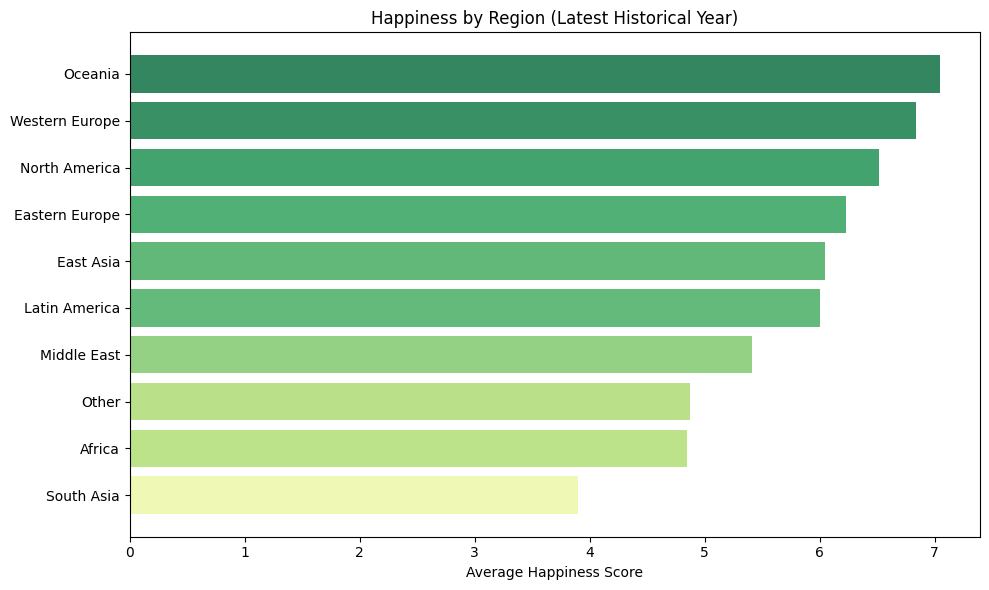

In [80]:
# Figure: Regional Comparison (bar chart)
from group_comparison import compare_regions

# Compute region_stats from the current dataframe (historical latest year)
region_stats = compare_regions(df)

fig, ax = plt.subplots(figsize=(10, 6))
region_sorted = region_stats.sort_values('avg_happiness', ascending=True)
colors = plt.cm.RdYlGn(region_sorted['avg_happiness'] / region_sorted['avg_happiness'].max())
ax.barh(region_sorted['region'], region_sorted['avg_happiness'], color=colors, alpha=0.8)
ax.set_xlabel('Average Happiness Score')
ax.set_title('Happiness by Region (Latest Historical Year)')
plt.tight_layout()
plt.show()

In [81]:
from group_comparison import compare_regions, compare_income_levels, statistical_significance_test

region_stats = compare_regions(df)
income_stats = compare_income_levels(df)
sig_test = statistical_significance_test(df, group_col='region')

print("Regional Comparison (Latest Year)")
print("="*60)
print(region_stats[['region', 'avg_happiness', 'country_count']].to_string(index=False))
print("\nIncome Level Comparison")
print(income_stats[['income_level', 'avg_happiness', 'country_count']].to_string(index=False))
print("\nStatistical Significance (Region pairs, p < 0.05):")
sig_pairs = sig_test[sig_test['significant']]
print(sig_pairs[['group1', 'group2', 'difference', 'p_value']].head(10).to_string(index=False))

Regional Comparison (Latest Year)
        region  avg_happiness  country_count
       Oceania       7.043000              2
Western Europe       6.841650             20
 North America       6.513778              9
Eastern Europe       6.227769             13
     East Asia       6.046000              6
 Latin America       6.006000             10
   Middle East       5.412100             10
         Other       4.872309             55
        Africa       4.844333             12
    South Asia       3.895667              6

Income Level Comparison
       income_level  avg_happiness  country_count
        High Income       6.938304             23
Upper Middle Income       5.608774             84
Lower Middle Income       4.423292             24
         Low Income       4.463917             12

Statistical Significance (Region pairs, p < 0.05):
    group1         group2  difference      p_value
South Asia          Other   -0.976642 1.937464e-02
South Asia         Africa   -0.948667 4.27

---

## 4. Proposed Method

### 4.1 Interactive Web-Based Dashboard

We developed a web-based Dash (Plotly) dashboard with six main tabs. The application is launched via `python app.py` and accessed at **http://127.0.0.1:8050**. Below we describe each tab and its components.

### Dashboard Tab Overview

| **Tab** | **Purpose** | **Key Components** |
|---------|-------------|---------------------|
| **World Map** | Choropleth map of happiness by country | Year selector, clickable countries, hover tooltips with all 7 metrics, modal for country details |
| **Driver Analysis** | Factor importance ranking | Weighted linear regression coefficients, regional driver comparison, R-squared |
| **Trends** | Temporal evolution 2011–2024 (discussion focused on 2013–2023) | Global average over time, regional trends, income-level trends, volatility metrics, top improvers/decliners |
| **Group Comparisons** | Statistical comparisons | Regional and income-level means, t-tests, ANOVA, factor differences by group, happiness gap analysis |
| **LLM Audit** | AI bias analysis | Overview (scatter LLM vs Real), Key Findings, Bias by Groups, Statistical Significance; Approach filter (Initial / Few-Shot / Single Question / Structured Personas) |
| **Overview** | Summary statistics | Total records, years, countries, key metrics in card layout |

### Technical Implementation

- **Framework:** Dash (Plotly) with custom CSS (gradient background, Inter font, card-based layout)
- **Data flow:** `data_loader`, `driver_analysis`, `trend_analysis`, `group_comparison`; LLM data from `load_llm_results.py` when available
- **Interactivity:** Callbacks for tab switching, year selection, country clicks, approach filtering

**Run the cell below** to start the dashboard and view it inline (or open the link in your browser). The same app is available by running `python app.py` in the terminal.

In [82]:
# Run the interactive dashboard (same app as python app.py)
# Run this notebook from the project root (folder containing app.py).
import os
import sys
if not os.path.isfile('app.py') and os.path.isfile(os.path.join('..', 'app.py')):
    os.chdir('..')
sys.path.insert(0, os.getcwd())

import threading
import time
from IPython.display import display, IFrame, HTML

# Import the Dash app (loads data and creates app)
from app import app

def run_dash():
    app.run(debug=False, port=8050, use_reloader=False)

thread = threading.Thread(target=run_dash, daemon=True)
thread.start()
time.sleep(2.5)  # allow server to bind

url = "http://127.0.0.1:8050"
display(HTML(f'<p style="font-size:16px;"><b>Dashboard is running.</b> Open in browser: <a href="{url}" target="_blank">{url}</a></p>'))
display(IFrame(src=url, width="100%", height=720))

### 4.2 Four Approaches Compared

| Approach | Questions | Calibration | Temperature | Purpose |
|----------|-----------|-------------|-------------|---------|
| **Initial** | 7 (1 overall + 6 factors) | None | 0.0 | Baseline implementation |
| **Few-Shot** | 7 (1 overall + 6 factors) | Few-shot examples + percentile anchoring | 0.3 | Reduced overestimation |
| **Single Question** | 1 (Cantril Ladder only) | None | 0.3 | Pure Gallup methodology |
| **Structured Personas** | 1 (Cantril Ladder only) | None | 0.3 | Same as Gallup; personas as structured fields (nationality, job, gender); nationality focus |

We evaluated four approaches to assess and reduce overestimation bias. The **Initial (7-Question)** method serves as a baseline, revealing significant overestimation and weak correlation with real data. The **Few-Shot (7-Question + Calibration)** approach applies in-context examples to reduce bias. The **Gallup (Single Question)** method simplifies the task by mirroring the established Cantril ladder survey format. Finally, the **Structured Personas (Single Question)** approach uses the same Cantril question but defines personas through structured attributes (e.g., nationality, job, gender) to enhance reproducibility and focus on nationality effects. Overall, the few-shot, single-question, and structured-personas methods outperform the initial baseline, achieving lower MAE, more realistic score distributions, and improved bias mitigation.

---

### 4.3 LLM Audit: First Approach (7-Question Method)

Our initial LLM audit uses 20 diverse personas spanning ages 18 to 67, occupations ranging from students to retirees, and varied life situations, and surveys them across all countries using seven questions consisting of one overall Cantril Ladder question and six factor specific questions. Each persona is prompted to embody a specific individual living in the target country in 2024. The API client operates with a temperature of 0.0 and a simplified prompt style, selected after systematic hyperparameter and prompt tuning. In terms of configuration, default parameters initially used a temperature of 0.7 but were adjusted to 0.0 after tuning, and outputs are parsed and stored as CSV files. The prompt includes instructions such as “Assume that you are this person living in 2024, and you are from [COUNTRY]”. The full audit covers 2,940 combinations derived from 147 countries and 20 personas, with results saved incrementally to CSV files to ensure reliability and reproducibility.


### Personas Table (20 Diverse Personas)

The 20 personas span ages 18–67, varied occupations, family situations, and employment status. Each persona is prompted to embody a specific individual living in the target country in 2024.

In [83]:
# Table: 20 Personas (full table from presentation)
personas_table = pd.DataFrame([
    {'ID': 1, 'Age': 28, 'Role / occupation': 'Software engineer (tech startup)', 'Family status': 'Family in another city', 'Living situation': 'Alone, small apartment', 'Employment': 'Employed'},
    {'ID': 2, 'Age': 45, 'Role / occupation': 'Primary school teacher', 'Family status': 'Married, 2 teenage children', 'Living situation': 'With family', 'Employment': 'Employed'},
    {'ID': 3, 'Age': 22, 'Role / occupation': 'University student (economics)', 'Family status': '—', 'Living situation': 'Shared apartment, 3 roommates', 'Employment': 'Student, part-time'},
    {'ID': 4, 'Age': 55, 'Role / occupation': 'Retired nurse', 'Family status': '3 adult children, cares for elderly parents', 'Living situation': 'Own home, long-term neighborhood', 'Employment': 'Retired'},
    {'ID': 5, 'Age': 35, 'Role / occupation': 'Small business owner (bakery)', 'Family status': 'Married (teacher), 1 child (6)', 'Living situation': 'With family', 'Employment': 'Self-employed'},
    {'ID': 6, 'Age': 19, 'Role / occupation': 'Recent HS grad, delivery driver', 'Family status': 'Parents, 2 younger siblings', 'Living situation': 'With parents, modest home', 'Employment': 'Employed'},
    {'ID': 7, 'Age': 50, 'Role / occupation': 'Construction worker', 'Family status': 'Divorced, joint custody of 2 children (12, 15)', 'Living situation': '—', 'Employment': 'Employed'},
    {'ID': 8, 'Age': 32, 'Role / occupation': 'Marketing manager', 'Family status': 'Single', 'Living situation': 'Alone, city-center apartment', 'Employment': 'Employed'},
    {'ID': 9, 'Age': 67, 'Role / occupation': 'Retired factory worker', 'Family status': 'Married 45 yrs, 4 children, 5 grandchildren', 'Living situation': 'With spouse, family nearby', 'Employment': 'Retired'},
    {'ID': 10, 'Age': 26, 'Role / occupation': 'Freelance graphic designer', 'Family status': 'Partner (retail)', 'Living situation': 'With partner, cat', 'Employment': 'Self-employed'},
    {'ID': 11, 'Age': 40, 'Role / occupation': 'Doctor (emergency dept)', 'Family status': 'Married (doctor), 2 children (5, 8)', 'Living situation': 'With family', 'Employment': 'Employed'},
    {'ID': 12, 'Age': 29, 'Role / occupation': 'Stay-at-home parent', 'Family status': 'Partner, 2 toddlers (2, 4)', 'Living situation': 'With family', 'Employment': 'Not employed (formerly finance)'},
    {'ID': 13, 'Age': 38, 'Role / occupation': 'Taxi driver (night shifts)', 'Family status': 'Married (nurse), 1 child (10)', 'Living situation': 'With family', 'Employment': 'Employed'},
    {'ID': 14, 'Age': 24, 'Role / occupation': 'Research assistant (env. science)', 'Family status': '—', 'Living situation': 'Studio near university', 'Employment': 'Employed'},
    {'ID': 15, 'Age': 60, 'Role / occupation': 'Farmer', 'Family status': 'Married (farmer), 3 adult children', 'Living situation': 'Family farm', 'Employment': 'Self-employed'},
    {'ID': 16, 'Age': 31, 'Role / occupation': 'Social worker', 'Family status': 'Single', 'Living situation': 'Alone, small apartment', 'Employment': 'Employed'},
    {'ID': 17, 'Age': 18, 'Role / occupation': 'High school student (final year)', 'Family status': 'Parents, 1 younger sibling', 'Living situation': 'With parents, suburban', 'Employment': 'Student'},
    {'ID': 18, 'Age': 48, 'Role / occupation': 'Restaurant manager', 'Family status': 'Married (accountant), 1 teenager', 'Living situation': 'With family', 'Employment': 'Employed'},
    {'ID': 19, 'Age': 36, 'Role / occupation': 'Architect (sustainable design)', 'Family status': 'Long-term partner (graphic designer), not married', 'Living situation': '—', 'Employment': 'Employed'},
    {'ID': 20, 'Age': 42, 'Role / occupation': 'Unemployed (ex-manufacturing)', 'Family status': 'Married (retail), 2 children (9, 12)', 'Living situation': 'With family', 'Employment': 'Unemployed'},
])
display(personas_table)

,ID,Age,Role / occupation,Family status,Living situation,Employment
0,1,28,Software engineer (tech startup),Family in another city,"Alone, small apartment",Employed
1,2,45,Primary school teacher,"Married, 2 teenage children",With family,Employed
2,3,22,University student (economics),—,"Shared apartment, 3 roommates","Student, part-time"
3,4,55,Retired nurse,"3 adult children, cares for elderly parents","Own home, long-term neighborhood",Retired
4,5,35,Small business owner (bakery),"Married (teacher), 1 child (6)",With family,Self-employed
5,6,19,"Recent HS grad, delivery driver","Parents, 2 younger siblings","With parents, modest home",Employed
6,7,50,Construction worker,"Divorced, joint custody of 2 children (12, 15)",—,Employed
7,8,32,Marketing manager,Single,"Alone, city-center apartment",Employed
8,9,67,Retired factory worker,"Married 45 yrs, 4 children, 5 grandchildren","With spouse, family nearby",Retired
9,10,26,Freelance graphic designer,Partner (retail),"With partner, cat",Self-employed


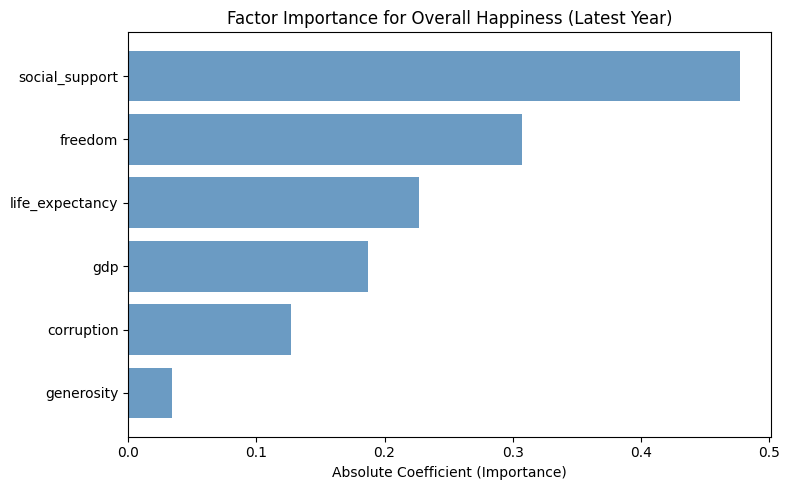

In [84]:
# Optional: Visualise driver importance
import matplotlib.pyplot as plt
importance_sorted = importance.sort_values('abs_coefficient', ascending=True)
plt.figure(figsize=(8, 5))
plt.barh(importance_sorted['feature'], importance_sorted['abs_coefficient'], color='steelblue', alpha=0.8)
plt.xlabel('Absolute Coefficient (Importance)')
plt.title('Factor Importance for Overall Happiness (Latest Year)')
plt.tight_layout()
plt.show()

In [85]:
# Runnable code for Initial LLM Audit (requires OPENAI_API_KEY in .env)
# Uncomment and run to execute the full audit. Results are saved incrementally.

# import os
# os.chdir('llm_audit_data/initial_approach')
# from run_audit import main
# main()

# For this notebook, we load the saved results:
import pandas as pd
from pathlib import Path

results_path = Path('llm_audit_data/initial_approach/results/llm_audit_results.csv')
if results_path.exists():
    df_initial = pd.read_csv(results_path)
    print(f"Loaded {len(df_initial)} LLM responses from Initial Approach")
    print(f"Countries: {df_initial['country'].nunique()}, Personas: {df_initial['persona_id'].nunique()}")
    print(df_initial[['country', 'persona_id', 'overall_happiness', 'gdp', 'social_support']].head(10))
else:
    print("Results file not found. Run the initial approach audit to generate data.")

Loaded 3360 LLM responses from Initial Approach
Countries: 168, Personas: 20
       country  persona_id  overall_happiness  gdp  social_support
0  Afghanistan           1                6.2  5.5             8.0
1  Afghanistan           2                4.8  3.2             8.0
2  Afghanistan           3                5.8  4.2             7.6
3  Afghanistan           4                5.2  3.0             7.5
4  Afghanistan           5                5.8  4.2             7.5
5  Afghanistan           6                5.5  4.0             8.0
6  Afghanistan           7                5.5  4.0             7.5
7  Afghanistan           8                6.4  7.2             6.8
8  Afghanistan           9                6.2  3.5             9.0
9  Afghanistan          10                4.8  3.5             6.5


---

### 4.4 Hyperparameter and Prompt Tuning

Before extending the audit to all countries, we systematically optimized API hyperparameters, including temperature and the use of chain of thought reasoning, as well as the overall prompt structure. Using a random sample of 10 countries, we evaluated each configuration against ground truth happiness data based on correlation, mean absolute error, and a combined performance score. The optimal setup used a temperature of 0.0, no chain of thought prompting, and a simplified prompt format. These results guided the design of our initial approach. To ensure reproducibility, the scripts `hyperparameter_tuning.py` and `prompt_tuning.py` located in the `llm_audit_data/` directory can be executed to replicate the experiments, with API outputs automatically stored as timestamped files in `llm_audit_data/results/`.


In [86]:
# Hyperparameter Tuning Results (from presentation - 10 countries)
hp_results = pd.DataFrame([
    {'Temperature': 0, 'Use chain of thought': False, 'Mean MAE': 4.49, 'Mean correlation': 0.789, 'Combined score': 0.34, 'Num countries': 10},
    {'Temperature': 0.9, 'Use chain of thought': True, 'Mean MAE': 4.57, 'Mean correlation': 0.749, 'Combined score': 0.292, 'Num countries': 10},
    {'Temperature': 0.5, 'Use chain of thought': False, 'Mean MAE': 4.497, 'Mean correlation': 0.685, 'Combined score': 0.235, 'Num countries': 10},
    {'Temperature': 0.5, 'Use chain of thought': True, 'Mean MAE': 4.544, 'Mean correlation': 0.622, 'Combined score': 0.168, 'Num countries': 10},
    {'Temperature': 0.9, 'Use chain of thought': False, 'Mean MAE': 4.539, 'Mean correlation': 0.605, 'Combined score': 0.151, 'Num countries': 10},
    {'Temperature': 0, 'Use chain of thought': True, 'Mean MAE': 4.533, 'Mean correlation': 0.571, 'Combined score': 0.118, 'Num countries': 10},
])
hp_results = hp_results.sort_values('Combined score', ascending=False)
print("Best: Temperature 0, Chain-of-Thought False (Combined score 0.34)")
display(hp_results)

Best: Temperature 0, Chain-of-Thought False (Combined score 0.34)


,Temperature,Use chain of thought,Mean MAE,Mean correlation,Combined score,Num countries
0,0.0,False,4.490,0.789,0.340,10
1,0.9,True,4.570,0.749,0.292,10
2,0.5,False,4.497,0.685,0.235,10
3,0.5,True,4.544,0.622,0.168,10
4,0.9,False,4.539,0.605,0.151,10
5,0.0,True,4.533,0.571,0.118,10


In [87]:
# Prompt Tuning Results (from presentation - A/B testing)
pt_results = pd.DataFrame([
    {'Prompt name': 'Simplified', 'Mean MAE': 4.531, 'Mean correlation': 0.528, 'Combined score': 0.075, 'Num countries': 10, 'Valid response rate': '100%'},
    {'Prompt name': 'Concise Persona', 'Mean MAE': 4.498, 'Mean correlation': 0.492, 'Combined score': 0.043, 'Num countries': 10, 'Valid response rate': '100%'},
    {'Prompt name': 'Step-by-step', 'Mean MAE': 4.534, 'Mean correlation': 0.494, 'Combined score': 0.04, 'Num countries': 10, 'Valid response rate': '100%'},
    {'Prompt name': 'Current/Baseline', 'Mean MAE': 4.306, 'Mean correlation': 0.469, 'Combined score': 0.039, 'Num countries': 10, 'Valid response rate': '100%'},
    {'Prompt name': 'Explicit Context', 'Mean MAE': 4.533, 'Mean correlation': 0.487, 'Combined score': 0.034, 'Num countries': 10, 'Valid response rate': '100%'},
    {'Prompt name': 'Few-shot Examples', 'Mean MAE': 4.643, 'Mean correlation': 0.493, 'Combined score': 0.028, 'Num countries': 10, 'Valid response rate': '100%'},
    {'Prompt name': 'JSON Format', 'Mean MAE': 4.524, 'Mean correlation': 0.387, 'Combined score': -0.065, 'Num countries': 10, 'Valid response rate': '100%'},
])
pt_results = pt_results.sort_values('Combined score', ascending=False)
print("Best: Simplified prompt (Combined score 0.075)")
display(pt_results)

Best: Simplified prompt (Combined score 0.075)


,Prompt name,Mean MAE,Mean correlation,Combined score,Num countries,Valid response rate
0,Simplified,4.531,0.528,0.075,10,100%
1,Concise Persona,4.498,0.492,0.043,10,100%
2,Step-by-step,4.534,0.494,0.040,10,100%
3,Current/Baseline,4.306,0.469,0.039,10,100%
4,Explicit Context,4.533,0.487,0.034,10,100%
5,Few-shot Examples,4.643,0.493,0.028,10,100%
6,JSON Format,4.524,0.387,-0.065,10,100%


In [88]:
# Hyperparameter tuning tests: temperature [0.0, 0.5, 0.9] × chain-of-thought [True, False]
# Prompt tuning tests: 7 variations (current, simplified, concise_persona, json_format, few_shot, explicit_context, step_by_step)
# Best: temp=0.0, CoT=False, prompt=simplified

# Check for saved tuning results (initial_approach/results and llm_audit_data/results)
import glob
from pathlib import Path
base = Path('llm_audit_data')
hp_files = sorted((base / 'initial_approach' / 'results').glob('hyperparameter_tuning_metrics_*.csv')) or sorted(base.glob('**/hyperparameter_tuning_metrics_*.csv'))
pt_files = sorted((base / 'initial_approach' / 'results').glob('prompt_tuning_metrics_*.csv')) or sorted(base.glob('**/prompt_tuning_metrics_*.csv'))
hp_files = [str(p) for p in hp_files]
pt_files = [str(p) for p in pt_files]

if hp_files:
    df_hp = pd.read_csv(sorted(hp_files)[-1])
    print("Hyperparameter Tuning Results (latest):")
    print(df_hp[['temperature', 'use_chain_of_thought', 'mean_correlation', 'mean_mae', 'combined_score']].to_string(index=False))
if pt_files:
    df_pt = pd.read_csv(sorted(pt_files)[-1])
    print("\nPrompt Tuning Results (latest):")
    print(df_pt[['prompt_name', 'mean_correlation', 'combined_score']].to_string(index=False))
if not hp_files and not pt_files:
    print("No tuning results found. Run hyperparameter_tuning.py and prompt_tuning.py to generate.")

Hyperparameter Tuning Results (latest):
 temperature  use_chain_of_thought  mean_correlation  mean_mae  combined_score
         0.0                 False          0.788951  4.489698        0.339982
         0.9                  True          0.749181  4.569857        0.292196
         0.5                 False          0.684816  4.496841        0.235132
         0.5                  True          0.622094  4.544460        0.167648
         0.9                 False          0.604719  4.538905        0.150829
         0.0                  True          0.571098  4.533349        0.117763

Prompt Tuning Results (latest):
      prompt_name  mean_correlation  combined_score
       Simplified          0.527993        0.074941
  Concise Persona          0.492430        0.042593
     Step-by-step          0.493582        0.040173
 Current/Baseline          0.469393        0.038841
 Explicit Context          0.487377        0.034040
Few-shot Examples          0.492558        0.028221
      JSON

In [89]:
# Table: Biggest Improvers and Decliners (trend analysis)
print("Biggest Improvers (2011 → latest):")
display(stats['biggest_improvers'])
print("\nBiggest Decliners:")
display(stats['biggest_decliners'])

Biggest Improvers (2011 → latest):


,country,change,start,end
121,Serbia,1.847,4.564,6.411
19,Bulgaria,1.574,3.889,5.463
76,Latvia,1.472,4.762,6.234
31,Congo,1.401,3.820,5.221
116,Romania,1.313,5.178,6.491
28,China,1.293,4.680,5.973
49,Georgia,1.293,3.892,5.185
81,Lithuania,1.230,5.588,6.818
110,Philippines,1.223,4.825,6.048
140,Togo,1.207,3.007,4.214



Biggest Decliners:


,country,change,start,end
0,Afghanistan,-2.537,4.258,1.721
77,Lebanon,-2.342,5.049,2.707
78,Lesotho,-1.712,4.898,3.186
69,Jordan,-1.520,5.706,4.186
152,Venezuela,-1.315,6.922,5.607
135,Syria,-1.273,4.735,3.462
155,Zambia,-1.203,4.705,3.502
84,Malawi,-1.203,4.624,3.421
17,Botswana,-1.198,4.581,3.383
144,Turkmenistan,-1.094,6.568,5.474


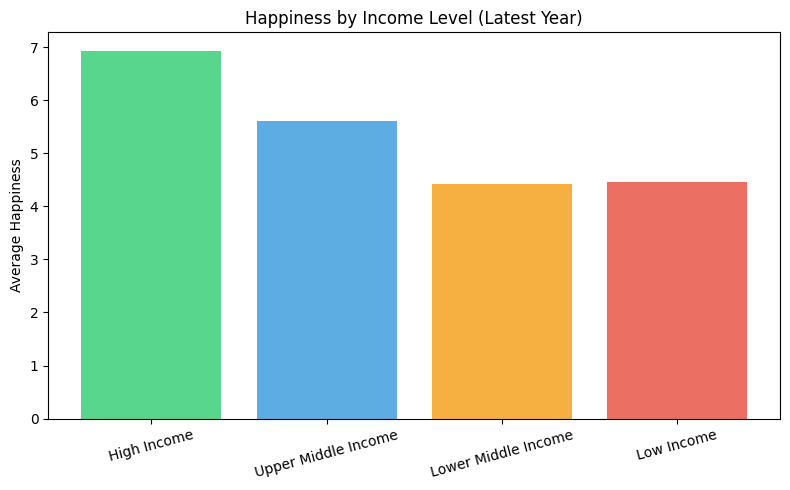

In [90]:
# Figure: Income Level Comparison
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(income_stats['income_level'], income_stats['avg_happiness'], color=['#2ecc71','#3498db','#f39c12','#e74c3c'], alpha=0.8)
ax.set_ylabel('Average Happiness')
ax.set_title('Happiness by Income Level (Latest Year)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Hyperparameter Tuning: Tested Combinations

| **Temperature** | **Chain-of-Thought** | **Purpose** |
|-----------------|----------------------|-------------|
| 0.0 | False | Deterministic, direct responses |
| 0.0 | True | Deterministic + explicit reasoning |
| 0.5 | False | Slight variability |
| 0.5 | True | Slight variability + reasoning |
| 0.9 | False | Higher creativity |
| 0.9 | True | Higher creativity + reasoning |

**Best:** Temperature 0.0, Chain-of-Thought False (highest correlation, lowest MAE). Results saved to `hyperparameter_tuning_metrics_*.csv`.

### Prompt Tuning: Tested Variations

| **Variation** | **Description** |
|---------------|-----------------|
| Current/Baseline | Original detailed prompt with full persona embodiment |
| Simplified | Shorter, concise version |
| Concise Persona | Reduced persona instructions |
| JSON Format | Output in JSON instead of brackets |
| Few-shot | Includes example responses |
| Explicit Context | More explicit country context instructions |
| Step-by-step | Structured reasoning approach |

**Best:** The best performing configuration used a simplified prompt, achieving the highest combined score defined as correlation minus MAE divided by ten. Key variations included adding calibration through real examples, introducing percentile anchors, and emphasizing realism in responses. The most effective style was a few shot approach with five concrete examples combined with structured JSON output for reliable parsing, which reduced ambiguity and improved accuracy. Overall, this process identified prompt designs that meaningfully reduce bias in LLM generated well being estimates.

---

### 4.5 Identifying High Overestimation: Root Causes

Comparing LLM generated country level averages with real world data revealed consistent overestimation across all metrics. We identified six main causes. First, a scale mismatch, since real factor data reflects regression contributions on a roughly 0 to 1.8 range, while the LLM produces scores on a 0 to 10 scale. Second, an optimism bias in which models tend to default to moderate or positive responses. Third, a lack of calibration due to missing reference points for realistic score distributions. Fourth, confusion between persona and country context, where individual characteristics may be overweighted relative to national conditions. Fifth, factor interpretation issues arising from ambiguous definitions, such as treating social support as binary rather than continuous. Sixth, the absence of negative examples, meaning prompts did not clearly signal that low scores are valid and expected in some contexts. These findings directly motivated the development of our improved few shot and single question approaches.


### Six Root Causes of Overestimation

| **#** | **Cause** | **Description** |
|-------|------------|-----------------|
| 1 | Scale mismatch | Real factors use regression contributions (0–1.8); LLM outputs 0–10 |
| 2 | LLM optimism bias | Models default to moderate-to-good responses (5–7 range) |
| 3 | Lack of calibration | No reference points for score distributions |
| 4 | Persona vs. country confusion | Personas may over-weight personal circumstances |
| 5 | Factor interpretation | Ambiguous definitions (e.g., social support binary vs. continuous) |
| 6 | No negative examples | Surveys did not emphasise that low scores are valid |

In [91]:
# Load LLM vs Real comparison (saved from analyze_llm_vs_real.py)
comp_path = Path('llm_audit_data/results/llm_vs_real_comparison.csv')
stats_path = Path('llm_audit_data/results/llm_vs_real_statistics.txt')

if comp_path.exists():
    df_comp = pd.read_csv(comp_path)
    print("LLM vs Real Data Comparison (sample)")
    print("="*60)
    cols = ['country', 'llm_overall_happiness', 'real_overall_happiness', 'diff_overall_happiness']
    print(df_comp[cols].head(15).to_string(index=False))
    print("\n" + "="*60)
if stats_path.exists():
    print(open(stats_path).read())

LLM vs Real Data Comparison (sample)
               country  llm_overall_happiness  real_overall_happiness  diff_overall_happiness
           Afghanistan                  3.525                   1.364                   2.161
               Albania                  5.605                   5.411                   0.194
               Algeria                  5.295                   5.571                  -0.276
             Argentina                  5.310                   6.397                  -1.087
               Armenia                  5.575                   5.494                   0.081
             Australia                  6.560                   6.974                  -0.414
               Austria                  6.650                   6.810                  -0.160
            Azerbaijan                  5.555                   4.875                   0.680
               Bahrain                  6.335                   6.030                   0.305
            Bangladesh 

### 7 Survey Questions (Method 1 and 2)

| **#** | **Metric** | **Question / Scale** |
|-------|------------|----------------------|
| 1 | Overall Happiness | Cantril Ladder: "On which step (0–10) do you stand?" |
| 2 | GDP | Economic satisfaction (0–10) |
| 3 | Social Support | "Do you have relatives/friends to count on?" (0–10) |
| 4 | Health | Physical and mental health rating (0–10) |
| 5 | Freedom | Satisfaction with freedom to choose (0–10) |
| 6 | Generosity | Donated to charity in past month? (0–10) |
| 7 | Corruption | Perceptions of government corruption (0–10) |

**Method 3 and 4** uses only question 1 (Cantril Ladder).

---

### 4.6 Improved Few-Shot Method

The few shot approach reduces overestimation through several targeted adjustments. First, it introduces five real country examples representing different percentiles from top to bottom performers, providing clear anchoring points; their true values are shown purely for calibration purposes and these countries are not included in the evaluation analysis to ensure fairness. Second, it uses percentile framing to contextualize scores, such as describing values around 5 to 6 as part of the global middle range. Third, the prompt emphasizes realism and honesty, references the global average of approximately 5.5, and includes the country name without signaling income level. Fourth, it explicitly validates low scores by providing examples in the 1 to 4 range, making it clear that such responses are legitimate. Fifth, ambiguous factors are clarified using continuous scale descriptions. In terms of configuration, a temperature of 0.3 is used to balance variability and stability, alongside neutral system prompts. Overall, this approach reduces overestimation by roughly one to two points and substantially increases the proportion of low scores, with about 20 to 30 percent falling in the 1 to 4 range.



In [92]:
# Few-shot approach: run_audit_improved.py (saves to few_shot_approach/results/)
few_shot_path = Path('llm_audit_data/few_shot_approach/results/llm_audit_results.csv')
approach_comp_path = Path('llm_audit_data/few_shot_approach/results_improved/approach_comparison.csv')

if few_shot_path.exists():
    df_few = pd.read_csv(few_shot_path)
    print(f"Few-Shot Approach: {len(df_few)} responses")
    print(f"Overall happiness mean: {df_few['overall_happiness'].mean():.3f}")
if approach_comp_path.exists():
    df_ac = pd.read_csv(approach_comp_path)
    exclude = ['original_mean', 'original_std', 'original_range', 'reduction']
    cols = [c for c in df_ac.columns if c not in exclude]
    print("\nApproach Comparison (Few-Shot vs Real):")
    print(df_ac[cols].to_string(index=False))

Few-Shot Approach: 6720 responses
Overall happiness mean: 5.560

Approach Comparison (Few-Shot vs Real):
           metric  improved_mean  improved_std improved_range  real_mean
overall_happiness       5.559613      0.929619      2.30-7.80   5.578170
              gdp       4.882946      1.265743      1.50-8.50   1.318701
   social_support       7.225744      0.617352      5.20-9.30   1.333395
           health       6.143839      0.861056      3.00-8.30   0.551493
          freedom       5.825030      1.231910      2.00-8.60   0.749253
       generosity       3.495119      0.810994      1.50-6.50   0.113442
       corruption       3.466637      1.715663      1.00-8.60   0.146815


**API call structure:** Each audit run iterates over countries and personas. For each (country, persona) pair, the system constructs a prompt that (1) instructs the model to embody the persona, (2) specifies the country and year (2024), and (3) presents the survey questions. The model returns a response in the format `[Overall, GDP, Social, Health, Freedom, Generosity, Corruption]`, which is parsed and stored. Results are saved incrementally after each country to allow resumption after interruptions. The saved CSV files (`llm_audit_results.csv`) contain columns: `country`, `persona_id`, `overall_happiness`, `gdp`, `social_support`, `health`, `freedom`, `generosity`, `corruption`.

---

### 4.7 Pure Gallup Methodology (Single Question)

The third approach closely mimics the original Gallup World Poll methodology to ensure conceptual purity and enable a clean baseline comparison. It relies on a single question, the Cantril Ladder, asking respondents to indicate on which step from 0 to 10 they stand, without any factor specific breakdown. The focus is solely on overall life evaluation, and factor columns are set to None to avoid decomposition effects. The prompt includes realistic system instructions, explicit validation of low scores, and clear country context. Using a temperature of 0.3 and an output format compatible with the other approaches, this method tests whether removing factor level questions reduces bias. In practice, it produces lower and more realistic scores than the initial multi question setup, suggesting that minimizing ambiguity and decomposition helps reduce overestimation.

In [93]:
# Single-question Gallup approach: run_audit_gallup.py
gallup_path = Path('llm_audit_data/single_question_gallup_approach/results/llm_audit_results.csv')

if gallup_path.exists():
    df_gallup = pd.read_csv(gallup_path)
    print(f"Single-Question Gallup Approach: {len(df_gallup)} responses")
    print(f"Overall happiness mean: {df_gallup['overall_happiness'].mean():.3f}")
    print(df_gallup[['country', 'persona_id', 'overall_happiness']].head(10))
else:
    print("Gallup results not found. Run run_audit_gallup.py to generate.")

Single-Question Gallup Approach: 3360 responses
Overall happiness mean: 5.532
       country  persona_id  overall_happiness
0  Afghanistan           1                4.8
1  Afghanistan           2                3.8
2  Afghanistan           3                4.5
3  Afghanistan           4                4.0
4  Afghanistan           5                4.0
5  Afghanistan           6                3.8
6  Afghanistan           7                3.5
7  Afghanistan           8                5.0
8  Afghanistan           9                4.5
9  Afghanistan          10                3.8


---

### 4.8 Structured Personas Approach (Single Question)

The fourth approach retains the same single Cantril Ladder question and Gallup style survey design as the third method, but replaces long narrative persona descriptions with structured persona fields. Rather than presenting a free-text paragraph, each respondent is defined through explicit attributes such as nationality, which is emphasized as the main identity focus, along with gender (added only to this approach after comments in the presentation), age, job, work details, living situation, family context, hobbies, and personal values or notes. The persona pool is fixed and fully reproducible, consisting of 20 personas with balanced gender representation and a shuffled order determined by a fixed random seed. The method reuses the same realistic system prompt and explicit low score validation from the single question Gallup approach, keeps the temperature at 0.3, and outputs a single bracketed number, with factor columns set to None to maintain consistency and methodological clarity.


In [94]:
# Structured Personas approach (Method 4): run_audit_structured.py
structured_path = Path('llm_audit_data/structured_personas_approach/results/llm_audit_results.csv')
if structured_path.exists():
    df_structured = pd.read_csv(structured_path)
    print(f"Structured Personas Approach: {len(df_structured)} responses")
    print(f"Overall happiness mean: {df_structured['overall_happiness'].mean():.3f}")
    print(df_structured[['country', 'persona_id', 'overall_happiness']].head(10))
else:
    print("Structured Personas results not found. Run run_audit_structured.py to generate.")

Structured Personas Approach: 3360 responses
Overall happiness mean: 5.444
       country  persona_id  overall_happiness
0  Afghanistan          20                2.8
1  Afghanistan           6                3.5
2  Afghanistan          15                3.5
3  Afghanistan           5                3.8
4  Afghanistan          10                3.5
5  Afghanistan          14                4.2
6  Afghanistan          16                3.5
7  Afghanistan          19                4.2
8  Afghanistan           7                3.8
9  Afghanistan          13                3.5


In [95]:
# Structured personas definition (Method 4) as table
import sys
from pathlib import Path
import pandas as pd

structured_dir = Path('llm_audit_data/structured_personas_approach')
if str(structured_dir) not in sys.path:
    sys.path.insert(0, str(structured_dir))
from structured_personas import get_all_structured_personas

personas = get_all_structured_personas()
df_personas = pd.DataFrame(personas)
df_personas

,id,nationality,gender,age,job,work_details,living_situation,family,hobbies,values_or_notes
0,20,{nationality},male,42,unemployed,Lost job in manufacturing 6 months ago; factor...,Family home with spouse and children.,Married to retail worker. Two school-age child...,Household tasks and childcare while searching.,"Worries constantly about finances, future, sup..."
1,6,{nationality},male,19,delivery driver,Food delivery service. Flexible hours. Saving ...,Lives with parents and two younger siblings in...,Parents and two younger siblings.,"Soccer with friends on weekends, movies, socia...",Dreams of studying abroad (Europe or Asia). Pr...
2,15,{nationality},male,60,farmer,40 years on the land. Family farm passed down ...,Family farm; countryside.,Married to another farmer. Three adult childre...,"Connection to nature, changing seasons, satisf...",Great pride in work and produce quality. Worri...
3,5,{nationality},female,35,small business owner (bakery),"Local bakery, 8 years in operation. Wakes at 4...",Family home.,Married to a teacher; one child age 6 who some...,"Cooking at home, watching cooking shows when p...",Loves work and customer connection; finds it p...
4,10,{nationality},female,26,freelance graphic designer,"Works from home; logos, websites, marketing ma...",Lives with partner (works in retail). Has a cat.,Partner; no children.,"Art, museums and galleries, music festivals in...",Enjoys flexibility and creative freedom. Somet...
5,14,{nationality},male,24,research assistant,University; data analysis and literature revie...,Small studio apartment near university; budget...,Independent.,"Academic conferences, coffee shops reading and...",Passionate about field. Excited about career a...
6,16,{nationality},female,31,social worker,"Helps families in need; poverty, domestic viol...",Single; lives alone in small apartment; quiet ...,Single; no children.,"Yoga and meditation, close friends who underst...",Dedicated to making a difference; believes in ...
7,19,{nationality},female,36,architect,Sustainable building projects; energy-efficien...,Own place.,Long-term relationship with graphic designer; ...,"Cycling to work, art galleries and architectur...",Believes better architecture can improve lives...
8,7,{nationality},male,50,construction worker,"25 years in industry, various building project...",Own place.,Divorced; joint custody of two children ages 1...,"Fishing at nearby lake, watching sports on TV,...",Appreciates job stability and supporting child...
9,13,{nationality},male,38,taxi driver,Driving 15 years; primarily night shifts 6 PM–...,Family home.,Married to a nurse (day shifts); see each othe...,Music and podcasts while driving. Family time ...,Meets many people; enjoys conversations. Appre...


In [96]:
# RUNNABLE: Execute from terminal: cd llm_audit_data/initial_approach && python run_audit.py
# Results are saved to results/llm_audit_results.csv (loaded in the cell below)

### Four LLM Audit Methods: Full Configuration

| **Aspect** | **Method 1: Initial** | **Method 2: Few-Shot** | **Method 3: Single Question** | **Method 4: Structured Personas** |
|------------|------------------------|------------------------|-------------------------------|-----------------------------------|
| **Questions** | 7 (Cantril Ladder + 6 factors) | 7 (same) | 1 (Cantril Ladder only) | 1 (same) |
| **Survey source** | `initial_approach/survey.py` | `few_shot_approach/survey_improved.py` | `single_question_gallup_approach/survey_gallup.py` | `structured_personas_approach/survey_gallup.py` |
| **Calibration** | None | 5 countries from real data (percentile-based), percentile anchoring | None | None |
| **Temperature** | 0.0 | 0.3 | 0.3 | 0.3 |
| **Prompt style** | Simplified (from tuning) | Realistic, explicit low-score validation | Realistic, country context | Structured fields (nationality, job, gender, etc.); nationality focus |
| **Output format** | `[Overall, GDP, Social, Health, Freedom, Generosity, Corruption]` | Same | `[score]` (single number) | `[score]` (single number) |
| **Personas** | 20 (shared across all) | 20 | 20 | 20 (structured: nationality, job, gender; 10 M / 10 F) |
| **Run script** | `run_audit.py` | `run_audit_improved.py` | `run_audit_gallup.py` | `run_audit_structured.py` |

---

## 5. Results: LLM vs Real and Bias Analysis

We developed dedicated analysis scripts, including `analyze_llm_vs_real.py` and `analyze_bias.py`, to systematically compare LLM outputs with real world data. The evaluation includes correlation measures such as Pearson and Spearman coefficients, RMSE, and mean and absolute differences, complemented by visualizations like scatter plots and heatmaps. Bias analysis is conducted using grouped t tests and ANOVA with a significance threshold of p less than 0.05, reporting effect sizes such as Cohen’s d and applying Bonferroni corrections for the primary LLM versus real comparisons across multiple groups. Countries are grouped by region, income level, and development status. The results are integrated into a real time dashboard and exported as structured files including `llm_vs_real_comparison.csv`, `bias_summary_*.csv`, and `significant_findings_*.csv`. The full analysis covers all 147 countries with WHR or Gallup data, using 20 personas per country and all four LLM audit approaches.


In [97]:
# Bias analysis: run from llm_audit_data/ as: python analyze_bias.py
import glob
sig_files = sorted(glob.glob('llm_audit_data/results/significant_findings_*.csv'))
bias_summary_files = sorted(glob.glob('llm_audit_data/results/bias_summary_*.csv'))

if sig_files:
    df_sig = pd.read_csv(sig_files[-1])
    print(f"Significant findings (p < 0.05): {len(df_sig)}")
    print(df_sig[['grouping', 'group_value', 'metric', 'mean_bias', 'p_value_vs_real']].head(15).to_string(index=False))
if bias_summary_files:
    df_bs = pd.read_csv(bias_summary_files[-1])
    overall = df_bs[df_bs['metric'] == 'diff_overall_happiness']
    print("\nBias by grouping (Overall Happiness):")
    print(overall[['grouping', 'group_value', 'mean_bias', 'count', 'significant']].head(20).to_string(index=False))

Significant findings (p < 0.05): 295
          grouping  group_value                 metric  mean_bias  p_value_vs_real
global_north_south Global South diff_overall_happiness   0.437436     8.184022e-19
global_north_south Global South   diff_life_evaluation   0.437436     8.184022e-19
global_north_south Global North               diff_gdp   4.421342     7.443070e-75
global_north_south Global South               diff_gdp   3.699679    1.706064e-181
global_north_south Global North    diff_social_support   6.418724     4.443614e-87
global_north_south Global South    diff_social_support   6.380110    2.946321e-233
global_north_south Global North            diff_health   5.982500    9.795864e-109
global_north_south Global South            diff_health   5.824463    7.276585e-269
global_north_south Global North           diff_freedom   6.253724     1.533238e-86
global_north_south Global South           diff_freedom   5.432940    2.395276e-182
global_north_south Global North        diff_genero

---

### 5.1 Key Findings

**Data Analysis:**
Economic prosperity, particularly GDP, and strong social support systems emerge as the most significant contributors to overall happiness, with robust regression coefficients. A clear gap persists between high and low income regions, highlighting enduring global inequalities in well being. Despite these disparities, the global average happiness score has remained relatively stable over the past decade, suggesting a consistent baseline even amid geopolitical and economic changes.

**LLM vs. Real Data:**
Across all four audit approaches and 147 countries with Gallup data, overall agreement between LLM outputs and World Happiness data is high, with Pearson correlation around 0.82 for life evaluation. However, substantial factor level overestimation persists, as GDP, social support, health, freedom, generosity, and corruption are overpredicted by approximately 3.5 to 6 points on the 0 to 10 scale. While the average country level bias appears small with a mean difference of about +0.05 and mean absolute difference around 0.54, this aggregate view masks structured disparities. LLM scores generally cluster slightly above real values, aligning better with high happiness countries and showing greater variability among lower scoring ones. Personas introduce additional variation, yet systematic country level shifts remain visible across groups.

**Systematic Bias:**
Bias patterns are not random but structurally patterned. Overestimation is significantly stronger in the Global South compared to the Global North, with differences remaining significant after Bonferroni correction. Low income and World 3 countries exhibit the most pronounced positive bias, whereas underestimation is rare and mostly limited to a few high income regions. Regionally, Africa and parts of Asia show the largest overestimations, and broader East West divides reflect cultural and developmental skews. Development based groupings further confirm that non high income and non developed countries are consistently more overestimated than developed clusters, with ANOVA and Bonferroni corrected t tests indicating that these differences are unlikely to be due to chance.

**Country Level Patterns in the Three Best Approaches:**
When focusing on the improved methods, namely the few shot, single question Gallup, and structured persona approaches, a consistent pattern emerges at the extremes. Lower income and Global South countries such as Botswana, Comoros, Eswatini, Bangladesh, Ghana, and Cambodia repeatedly appear among the most overestimated cases. In contrast, high happiness Western and Nordic countries including Costa Rica, Finland, Denmark, Canada, Belize, other Nordic states, Israel, and the State of Palestine are frequently underestimated. This suggests that even after calibration and methodological refinement, LLMs retain an optimistic prior for economically disadvantaged contexts and a more conservative prior for already high performing or contextually complex countries. As a result, real global inequalities are compressed, with poorer countries portrayed as better off than they are and highly satisfied or politically sensitive societies receiving slightly dampened scores. If such synthetic outputs are interpreted as ground truth, they may distort policy insights and fairness evaluations.



In [98]:
# Table: Bias Summary (Overall Happiness by grouping)
bias_files = sorted(glob.glob('llm_audit_data/results/bias_summary_*.csv'))
if bias_files:
    df_bs = pd.read_csv(bias_files[-1])
    overall = df_bs[df_bs['metric'] == 'diff_overall_happiness'][['grouping', 'group_value', 'mean_bias', 'count', 'significant', 'p_value_vs_real']]
    print("Bias by Grouping (Overall Happiness)")
    display(overall)
else:
    print("bias_summary_*.csv not found.")

Bias by Grouping (Overall Happiness)


,grouping,group_value,mean_bias,count,significant,p_value_vs_real
0,global_north_south,Global North,-0.056224,152,False,1.731595e-01
1,global_north_south,Global South,0.437436,436,True,8.184022e-19
16,world_123,World 1,-0.151239,88,True,7.171217e-03
17,world_123,World 2,0.345914,464,True,2.086970e-15
18,world_123,World 3,0.971694,36,True,2.007557e-05
40,continent,Africa,0.703354,48,True,8.667563e-07
41,continent,Asia,0.572620,92,True,3.713357e-07
42,continent,Europe,-0.059848,132,False,1.682171e-01
43,continent,North America,-0.475417,36,True,2.660571e-05
44,continent,Oceania,-0.180500,8,False,1.909599e-01


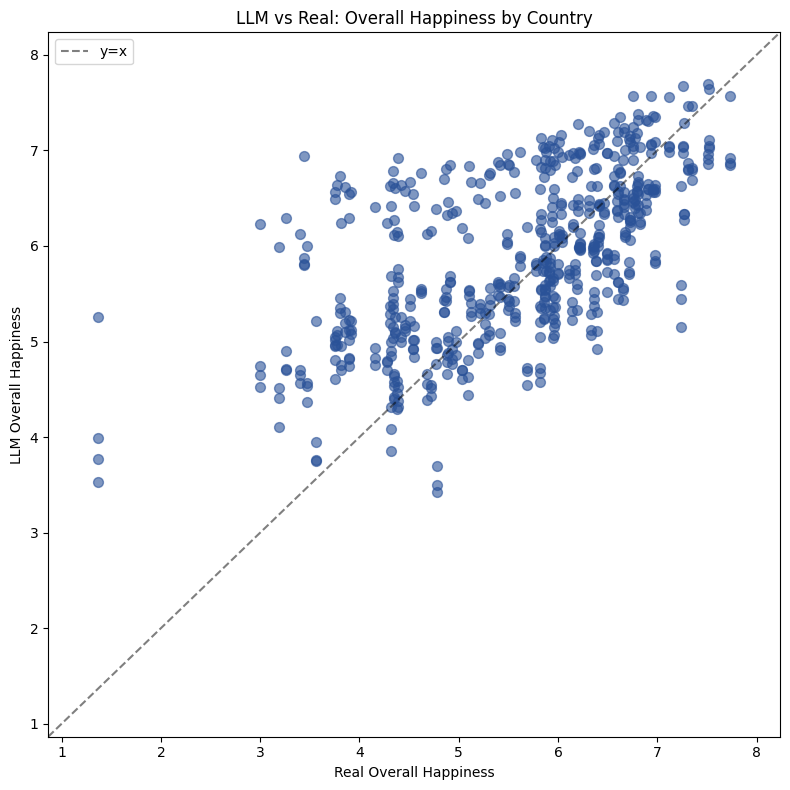

In [99]:
# Figure: LLM vs Real Overall Happiness (scatter plot)
comp_path = Path('llm_audit_data/results/llm_vs_real_comparison.csv')
if comp_path.exists():
    df_comp = pd.read_csv(comp_path)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(df_comp['real_overall_happiness'], df_comp['llm_overall_happiness'], alpha=0.6, s=50, c='#2a5298')
    lims = [min(df_comp['real_overall_happiness'].min(), df_comp['llm_overall_happiness'].min()) - 0.5,
            max(df_comp['real_overall_happiness'].max(), df_comp['llm_overall_happiness'].max()) + 0.5]
    ax.plot(lims, lims, 'k--', alpha=0.5, label='y=x')
    ax.set_xlabel('Real Overall Happiness')
    ax.set_ylabel('LLM Overall Happiness')
    ax.set_title('LLM vs Real: Overall Happiness by Country')
    ax.legend()
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    plt.tight_layout()
    plt.show()

In [100]:
# Table: Significant Findings (sample, p < 0.05)
sig_files = sorted(glob.glob('llm_audit_data/results/significant_findings_*.csv'))
if sig_files:
    df_sig = pd.read_csv(sig_files[-1])
    print(f"Total significant findings: {len(df_sig)}")
    display(df_sig[['grouping', 'group_value', 'metric', 'mean_bias', 'p_value_vs_real']].head(20))

Total significant findings: 295


,grouping,group_value,metric,mean_bias,p_value_vs_real
0,global_north_south,Global South,diff_overall_happiness,0.437436,8.184022e-19
1,global_north_south,Global South,diff_life_evaluation,0.437436,8.184022e-19
2,global_north_south,Global North,diff_gdp,4.421342,7.443070e-75
3,global_north_south,Global South,diff_gdp,3.699679,1.706064e-181
4,global_north_south,Global North,diff_social_support,6.418724,4.443614e-87
5,global_north_south,Global South,diff_social_support,6.380110,2.946321e-233
6,global_north_south,Global North,diff_health,5.982500,9.795864e-109
7,global_north_south,Global South,diff_health,5.824463,7.276585e-269
8,global_north_south,Global North,diff_freedom,6.253724,1.533238e-86
9,global_north_south,Global South,diff_freedom,5.432940,2.395276e-182


In [101]:
# Table: Four Approaches Mean Comparison (with bias)
from pathlib import Path
import pandas as pd

approaches_data = []
for name, path in [
    ('Initial', Path('llm_audit_data/initial_approach/results/llm_audit_results.csv')),
    ('Few-Shot', Path('llm_audit_data/few_shot_approach/results/llm_audit_results.csv')),
    ('Single Question', Path('llm_audit_data/single_question_gallup_approach/results/llm_audit_results.csv')),
    ('Structured Personas', Path('llm_audit_data/structured_personas_approach/results/llm_audit_results.csv')),
]:
    if path.exists():
        d = pd.read_csv(path)
        approaches_data.append({
            'Approach': name,
            'Mean Overall': round(d['overall_happiness'].mean(), 3),
            'N': len(d),
        })

df_approaches = pd.DataFrame(approaches_data)

# Add mean over-/underestimation from comparison file if available
comp_path = Path('llm_audit_data/results/llm_vs_real_comparison.csv')
if comp_path.exists():
    comp = pd.read_csv(comp_path)

    # Signed and absolute bias for overall happiness (LLM - real)
    bias = comp.groupby('approach')['diff_overall_happiness'].agg(
        mean_bias='mean',
        mean_abs_bias=lambda x: x.abs().mean(),
    ).reset_index()

    # Map internal approach names to display labels
    name_map = {
        'initial': 'Initial',
        'few_shot': 'Few-Shot',
        'single_question': 'Single Question',
        'structured_personas': 'Structured Personas',
    }
    bias['Approach'] = bias['approach'].map(name_map)
    bias = bias.dropna(subset=['Approach'])
    bias = bias[['Approach', 'mean_bias', 'mean_abs_bias']]

    df = df_approaches.merge(bias, on='Approach', how='left')
    df = df.rename(columns={
        'mean_bias': 'Mean Bias (LLM - Real)',
        'mean_abs_bias': 'Mean |Bias|',
    })
    display(df)
else:
    display(df_approaches)

,Approach,Mean Overall,N,Mean Bias (LLM - Real),Mean |Bias|
0,Initial,6.737,3360,1.206932,1.217476
1,Few-Shot,5.560,6720,0.051558,0.536279
2,Single Question,5.532,3360,0.033871,0.534769
3,Structured Personas,5.444,3360,-0.053068,0.551558


In [102]:
# Table: LLM vs Real Comparison (full statistics by metric)
stats_path = Path('llm_audit_data/results/llm_vs_real_statistics.txt')
if stats_path.exists():
    print(open(stats_path).read())
else:
    print("llm_vs_real_statistics.txt not found.")

LLM vs Real Data Comparison Statistics

Total countries compared: 147

OVERALL HAPPINESS:
  Mean Difference (LLM - Real): 0.052
  Std Dev of Differences: 0.712
  Mean Absolute Difference: 0.536
  Correlation: 0.817

LIFE EVALUATION:
  Mean Difference (LLM - Real): 0.052
  Std Dev of Differences: 0.712
  Mean Absolute Difference: 0.536
  Correlation: 0.817

GDP:
  Mean Difference (LLM - Real): 3.641
  Std Dev of Differences: 0.541
  Mean Absolute Difference: 3.641
  Correlation: 0.839

SOCIAL SUPPORT:
  Mean Difference (LLM - Real): 5.922
  Std Dev of Differences: 0.255
  Mean Absolute Difference: 5.922
  Correlation: 0.698

HEALTH:
  Mean Difference (LLM - Real): 5.629
  Std Dev of Differences: 0.226
  Mean Absolute Difference: 5.629
  Correlation: 0.761

FREEDOM:
  Mean Difference (LLM - Real): 5.186
  Std Dev of Differences: 0.719
  Mean Absolute Difference: 5.186
  Correlation: 0.560

GENEROSITY:
  Mean Difference (LLM - Real): 3.395
  Std Dev of Differences: 0.270
  Mean Absolute D

In [103]:
# Table: LLM vs Real Comparison (country-level, top 20 by absolute difference)
comp_path = Path('llm_audit_data/results/llm_vs_real_comparison.csv')
if comp_path.exists():
    df_comp = pd.read_csv(comp_path)
    df_comp['abs_diff'] = df_comp['diff_overall_happiness'].abs()
    top20 = df_comp.nlargest(20, 'abs_diff')[['country', 'llm_overall_happiness', 'real_overall_happiness', 'diff_overall_happiness']]
    print("Top 20 Countries by Absolute Difference (LLM − Real)")
    display(top20)
else:
    print("llm_vs_real_comparison.csv not found.")

Top 20 Countries by Absolute Difference (LLM − Real)


,country,llm_overall_happiness,real_overall_happiness,diff_overall_happiness
147,Afghanistan,5.260,1.364,3.896
162,Botswana,6.940,3.438,3.502
263,Sierra Leone,6.225,2.998,3.227
227,Malawi,6.290,3.260,3.030
276,Tanzania,6.735,3.800,2.935
187,Eswatini,6.635,3.774,2.861
221,Lesotho,6.570,3.757,2.813
220,Lebanon,5.985,3.188,2.797
156,Bangladesh,6.615,3.851,2.764
173,Comoros,6.495,3.754,2.741


---

## 6. Discussion: Limitations and Future Work

**Limitations:**
This study adopts a specific conceptualization of happiness as life evaluation measured by the Cantril Ladder, which captures cognitive well-being but does not fully reflect emotional or eudaimonic dimensions. The World Happiness Report and Gallup World Poll rely on finite national samples, typically around one thousand respondents with complex sampling weights, and may be affected by non-response, cultural response styles, and measurement noise, and we should acknowledge that it has its own limitations and it is not too reliable as ground truth. The selected explanatory factors such as GDP, social support, health, freedom, generosity, and corruption reflect a largely Western research tradition and may underrepresent other culturally salient drivers like religion, spirituality, or community cohesion. On the LLM side, API stochasticity, especially when temperature is above zero, can produce slight variation across runs; we mitigate this by aggregating across 20 personas per country, though repeated runs or ensembles would provide stronger stability estimates. Persona coverage remains limited, as 20 profiles cannot capture full socio cultural diversity, and some roles may carry implicit stereotypes. Our statistical design involves many group by metric by approach comparisons, so we apply Bonferroni correction to primary LLM versus real tests, which reduces false positives but may obscure weaker true effects. 

**Future Directions:**
Future work should extend beyond cognitive life evaluation by incorporating affective and eudaimonic well-being measures. Persona design can be expanded with more diverse and intersectional identities, alongside systematic comparisons between narrative and fully structured formats. Greater integration of Gallup methodological documentation and margins of error would allow explicit modeling of survey uncertainty. Factor models could be broadened to include culturally specific drivers while avoiding overfitting. Comparative audits across multiple LLM families and the inclusion of reasoning traces would help disentangle numerical bias from content level bias. Repeated runs and ensemble methods could quantify temporal variability in LLM outputs. Ultimately, integrating these auditing tools into policy workflows would enable continuous and longitudinal monitoring of AI bias in well being measurement.


---

## 7. Conclusion

This project delivered a comprehensive analysis of World Happiness Report data and a systematic audit of LLM bias in happiness representation. We demonstrated that traditional statistical methods and LLM-based simulation can be combined to both understand global well-being and critically evaluate AI systems. Our four methodological approaches, initial 7-question, few-shot calibration, pure Gallup single-question, and structured-personas single-question, offer a framework for future research on AI fairness in subjective well-being domains.

---

## References

[1] World Happiness Report 2025 (latest report using Cantril Ladder in life evaluation model).
PDF: https://files.worldhappiness.report/WHR25.pdf

[2] Peitz D et al. (2024). Validation of the Warwick-Edinburgh Mental Well-Being Scale (WEMWBS). Health and Quality of Life Outcomes.
Free article: https://pmc.ncbi.nlm.nih.gov/articles/PMC11515111/

[3] Kamruzzaman M, Shovon MI, Kim GL (2024). Investigating Subtler Biases in LLMs: Ageism, Beauty, Institutional, and Nationality Bias in Generative Models. In Findings of ACL 2024.
PDF: https://aclanthology.org/2024.findings-acl.530/

[4] Bellamy RK, Dey K, Hind M et al. (2018). AI Fairness 360: Toolkit for Detecting and Mitigating Unwanted Algorithmic Bias. arXiv.
https://arxiv.org/abs/1810.01943

[5] Madaio M, Stark L, Vaughan J, Wallach H (2020). Co-Designing Checklists to Understand Organizational Challenges and Opportunities around Fairness in AI. ACM CHI Proceedings.
https://doi.org/10.1145/3313831.3376445

[6] Weerts H, Dudík M, Edgar R, et al. (2023). Fairlearn: Assessing and Improving Fairness of AI Systems. arXiv.
https://arxiv.org/abs/2303.16626

[7] Kahneman D, Deaton A (2010). High income improves evaluation of life but not emotional well-being. PNAS.
https://doi.org/10.1073/pnas.1011492107

[8] Helliwell JF, Layard R, Sachs JD (2012). World Happiness Report 2012. United Nations Sustainable Development Solutions Network.
https://worldhappiness.report/ed/2012/

[9] Diener E, Suh EM, Lucas RE, Smith HL (1999). Subjective well-being: Three decades of progress. Psychological Bulletin, 125(2), 276–302.
https://doi.org/10.1037/0033-2909.125.2.276

[10] Veenhoven R (2012). Happiness: Also Known as “Life Satisfaction” and “Subjective Well-Being”. In Handbook of Social Indicators and Quality of Life Research.
https://doi.org/10.1007/978-94-007-2421-1_3

[11] Bender EM, Gebru T, McMillan-Major A, Shmitchell S (2021). On the Dangers of Stochastic Parrots: Can Language Models Be Too Big? FAccT 2021.
https://doi.org/10.1145/3442188.3445922

[12] Abid A, Farooqi M, Zou J (2021). Persistent Anti-Muslim Bias in Large Language Models. AAAI/ACM AIES.
https://doi.org/10.1145/3461702.3462624

[13] Barocas S, Hardt M, Narayanan A (2019). Fairness and Machine Learning.
https://fairmlbook.org

[14] Mitchell M et al. (2019). Model Cards for Model Reporting. FAT 2019.
https://doi.org/10.1145/3287560.3287596

---

## Notes on AI Use

As announced during the seminar, and as Till emailed, this section provides transparency regarding how AI tools were used and reflects critically on their role in the development of our project.

### (a) Summary of AI Use

AI assistants were used in several capacities. For the brainstorming process, we fully rely on the literature, datasets, avaiable datasets and we rely on the prior work and the suggestions of Ingmar for the methodology and the LLM audit approach we decided to do. For the parts of use of LLMs, first, for code development and debugging, including structuring data pipelines, implementing statistical analyses, and integrating the four LLM audit approaches we used Cursor. Second, for documentation, such as drafting README files, workflow descriptions, and explanatory sections of this notebook we used Cursor and ChatGPT itself. Third, for literature support, suggesting relevant references and helping frame the related work section, we used Perplexity and ChatGPT together to find references, as well as Google Scholar. Finally, Cursor and ChatGPT assisted with notebook organization, structuring the document in a scientific paper format and ensuring that code cells were clearly commented and reproducible, however after that all the explanations, writings and stuff were revised by ourselves, and we added/removed things (since all the LLM writings were not correct).

### (b) Critical Reflection

**What worked well:**
AI assistants significantly accelerated the implementation of repetitive analytical components, particularly bias analysis across multiple groupings and approaches. Cursor helped us a lot for code implementation, and specifically for dashboard creation, and also for the LLM audit part, we thought in a high-level way and it could do most of the concrete tasks in a good way (not perfect, it needed iterations, but that was a fine starting point). Additionally, they supported the generation of clear, academically styled explanations.

**What did not work well:**
The codes generated by Cursor, sometimes did not follow our approach and they were far away from what we thought, as it did not understand our intent well. While, in most of the cases the starting point's generated-code was fine, but it needed a bunch of refinments in many iterations. We started very soon before the Christmas Break, and we did the code implementaion iteratively by the use of LLMs, as it needed refinement a lot. Also, suggested citations and literature references required independent verification, as some of them they did not exist at all (it just invented new citations), or they were irrelevant. But, in my experience asking Perplexity to find relevant links that was the best approach. Also, for notebook writing, Cursor and ChatGPT helped a lot, but they were really inaccurate in such scale of such big file. It needed a lot of refinements, revisions, restructuring sections, and rewriting parts through iterations on the sections one by one, as it was a big file, and they performed poor ont that. In some instances, generated solutions were overly generic and needed adaptation to fit the dataset and analytical design.

**What we would do differently:**
Sometimes during the iterative development phase and code implementation with the LLMs, we just defined something roughly and asked the LLM to implement it. While, right now, at the end of the day we figure out that it was not a good idea, as the base prompt in code development and the initial draft of the code was really important to be strong and accurate enough to make the life easier in the refinment iterations. Since, in our case when we did it fast and rough idea first, we would spend much more time on refinment. So, in the next projects we may try to make the idea as concrete as possible and with details with a good prompt and do not hand over the process all in the area of decision of the LLM itself. It could save a lot time from us, if we would do it in that manner!
